In [ ]:
#C2054492

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [361]:
df = pd.read_csv("Coursework_1_data.csv")

In [362]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [363]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])

In [364]:
X_num = df.iloc[:,0:10]
X_cat = df.iloc[:,10:17]
y = df.Revenue

In [365]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

In [366]:
# Convert categoric data

In [367]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
X_categorical = df[categorical_features]


In [368]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_categorical = X_categorical.astype("object")
X_cat = pd.get_dummies(X_categorical)

In [369]:
X_cat

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12326,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12327,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12328,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [370]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=1)

df_bouncerate_exitrate = df[["ExitRates", "BounceRates"]]
pca_exit_bounce_rate = pca_breast.fit_transform(df_bouncerate_exitrate)

df_productRelated = df[["ProductRelated", "ProductRelated_Duration"]]
pca_product_related = pca_breast.fit_transform(df_productRelated)

df_Informational = df[["Informational", "Informational_Duration"]]
pca_Informational = pca_breast.fit_transform(df_Informational)

df_Administrative = df[["Administrative", "Administrative_Duration"]]
pca_Administrative = pca_breast.fit_transform(df_Administrative)


In [371]:
df = df.drop(["ExitRates", "BounceRates", "ProductRelated", "ProductRelated_Duration"],1)
df["PCA_Exit_Bounce_Rate"] = pca_exit_bounce_rate
df["PCA_Product_Related"] = pca_product_related
df["Pca_Informational"] = pca_Informational
df["Pca_Administrative"] = pca_Administrative

In [372]:
# Convert numeric data

In [373]:
numerical_features = ["Pca_Informational", "Pca_Administrative", "PCA_Product_Related", 
                      "PageValues", "SpecialDay", "PCA_Exit_Bounce_Rate"]
X_numerical = df[numerical_features]

In [374]:
minmaxscaler = MinMaxScaler()
X_num = minmaxscaler.fit_transform(X_numerical)
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_num = powertransformer.fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns= numerical_features)

In [375]:
X_num

,Pca_Informational,Pca_Administrative,PCA_Product_Related,PageValues,SpecialDay,PCA_Exit_Bounce_Rate
0,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
1,-0.451278,-0.828156,-1.124643,-0.501956,-0.33602,1.216453
2,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
3,-0.451278,-0.828156,-1.252445,-0.501956,-0.33602,1.785005
4,-0.451278,-0.828156,-0.158714,-0.501956,-0.33602,0.785678
...,...,...,...,...,...,...
12325,-0.451278,1.282813,1.007043,1.897477,-0.33602,-0.028589
12326,-0.451278,-0.828156,-0.401326,-0.501956,-0.33602,-0.564069
12327,-0.451278,-0.828156,-0.888120,-0.501956,-0.33602,1.710898
12328,-0.451278,0.601755,-0.597388,-0.501956,-0.33602,-0.575630


In [376]:
X = pd.concat([X_cat, X_num],1);X

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1,Pca_Informational,Pca_Administrative,PCA_Product_Related,PageValues,SpecialDay,PCA_Exit_Bounce_Rate
0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
1,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,-0.451278,-0.828156,-1.124643,-0.501956,-0.33602,1.216453
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,-0.451278,-0.828156,-1.258159,-0.501956,-0.33602,2.036137
3,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,-0.451278,-0.828156,-1.252445,-0.501956,-0.33602,1.785005
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,-0.451278,-0.828156,-0.158714,-0.501956,-0.33602,0.785678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,-0.451278,1.282813,1.007043,1.897477,-0.33602,-0.028589
12326,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,-0.451278,-0.828156,-0.401326,-0.501956,-0.33602,-0.564069
12327,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,-0.451278,-0.828156,-0.888120,-0.501956,-0.33602,1.710898
12328,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,-0.451278,0.601755,-0.597388,-0.501956,-0.33602,-0.575630


In [377]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [378]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state = 42)
y_train  = y_train.values
y_test  = y_test.values

In [381]:
pd.DataFrame(y_train).value_counts()

False    7816
True     1431
dtype: int64

In [382]:
#smote = SMOTE(sampling_strategy=0.2)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [383]:

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [384]:
param_grid_random_forest = {'bootstrap': [True],
             'max_depth': [ 20, 40, 50],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200]}


In [385]:
myClassifier = Pipeline([
    ("gridSearch", GridSearchCV(RandomForestClassifier(), param_grid_random_forest, refit= True, verbose= 3))
])
# evaluate pipeline
myClassifier.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.845, total=   0.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.843, total=   0.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.853, total=   0.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.839, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.859, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.862, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.857, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.4min finished


Pipeline(steps=[('gridSearch',
                 GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={'bootstrap': [True],
                                          'max_depth': [20, 40, 50],
                                          'max_features': ['auto', 'sqrt'],
                                          'min_samples_leaf': [2, 5],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [10, 50, 100, 200]},
                              verbose=3))])

In [386]:
y_pred = myClassifier.predict(X_test)

In [387]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
accuracyScore = accuracy_score(y_test, y_pred)
precisionScore = precision_score(y_test, y_pred)
recallScore = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
f05_score = fbeta_score(y_test, y_pred, beta= 0.5)
f2_score = fbeta_score(y_test, y_pred, beta= 2)
Kappa_score = cohen_kappa_score(y_test, y_pred)
Auc_score = roc_auc_score(y_test, y_pred)




print("Accuracy Score: {}\n".format(accuracyScore))
print("Precision Score: {}\n".format(precisionScore))
print("Recall Score: {}\n".format(recallScore))
print("F1 Score: {}\n".format(f1Score))
print("F0.5 Score: {}\n".format(f05_score))
print("F2 Score: {}\n".format(f2_score))
print("Kappa_score: {}\n".format(Kappa_score))
print("AUC score: {}\n".format(Auc_score))

Accuracy Score: 0.8582549464807007

Precision Score: 0.5268817204301075

Recall Score: 0.8218029350104822

F1 Score: 0.6420966420966421

F0.5 Score: 0.5676223573704026

F2 Score: 0.7390648567119156

Kappa_score: 0.5589322480076555

AUC score: 0.8433650131690938



In [419]:
from sklearn.metrics import confusion_matrix, classification_report

print("*************RandomForest-RandomUnderSampling***********")

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("F2 Score: {}".format(fbeta_score(y_test, y_pred, beta = 2)))
      
print(confusion_matrix(y_test, y_pred))
      
print(classification_report(y_test, y_pred))

*************RandomForest-RandomUnderSampling***********
Recall Test: 0.8259958071278826
F2 Score: 0.7348004475941813
[[2227  379]
 [  83  394]]
              precision    recall  f1-score   support

       False       0.96      0.85      0.91      2606
        True       0.51      0.83      0.63       477

    accuracy                           0.85      3083
   macro avg       0.74      0.84      0.77      3083
weighted avg       0.89      0.85      0.86      3083



In [439]:
myClassifier.named_steps["gridSearch"].best_estimator_.feature_importances_

array([0.60044967, 0.11143973, 0.0929297 , 0.05984568, 0.03628488,
       0.02389264, 0.01104139, 0.01005615, 0.00600651, 0.0073759 ,
       0.00564278, 0.00809643, 0.0071325 , 0.00240315, 0.00676001,
       0.00526157, 0.00538133])

In [430]:
feature_importance = myClassifier.named_steps["gridSearch"].best_estimator_.feature_importances_

In [431]:
feature_importance

array([0.60044967, 0.11143973, 0.0929297 , 0.05984568, 0.03628488,
       0.02389264, 0.01104139, 0.01005615, 0.00600651, 0.0073759 ,
       0.00564278, 0.00809643, 0.0071325 , 0.00240315, 0.00676001,
       0.00526157, 0.00538133])

In [432]:
feature_importance = pd.DataFrame(feature_importance)
col = pd.DataFrame(X.columns)

In [433]:
df_feature_importance = pd.concat([col, feature_importance],1)
df_feature_importance.columns = ["Feature", "Score"]

In [459]:
df_feature_importance = df_feature_importance.sort_values("Score", ascending= False)

In [465]:
df_feature_importance.head(20)

,Feature,Score
0,PageValues,0.600450
1,PCA_Exit_Bounce_Rate,0.111440
2,PCA_Product_Related,0.092930
3,Pca_Administrative,0.059846
4,Month_7,0.036285
5,Pca_Informational,0.023893
6,TrafficType_2,0.011041
7,Month_6,0.010056
11,VisitorType_2,0.008096
9,Month_5,0.007376


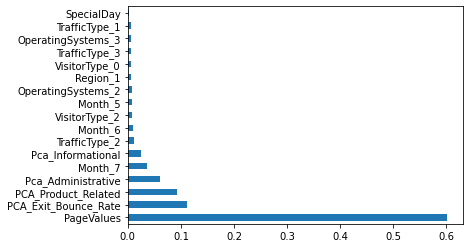

In [461]:
feat_importances = pd.Series(df_feature_importance.Score.values, index=df_feature_importance.Feature.values)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [462]:
df_feature_importance.Score.values

array([0.60044967, 0.11143973, 0.0929297 , 0.05984568, 0.03628488,
       0.02389264, 0.01104139, 0.01005615, 0.00809643, 0.0073759 ,
       0.0071325 , 0.00676001, 0.00600651, 0.00564278, 0.00538133,
       0.00526157, 0.00240315])

In [467]:
df_important_features = df_feature_importance[df_feature_importance.Score > 0.001]

In [468]:
df_important_features.Feature.unique()

array(['PageValues', 'PCA_Exit_Bounce_Rate', 'PCA_Product_Related',
       'Pca_Administrative', 'Month_7', 'Pca_Informational',
       'TrafficType_2', 'Month_6', 'VisitorType_2', 'Month_5',
       'OperatingSystems_2', 'Region_1', 'VisitorType_0', 'TrafficType_3',
       'OperatingSystems_3', 'TrafficType_1', 'SpecialDay'], dtype=object)